# Regression Model 

## Predicting how long it will be delayed

### Arrival Delay Prediction

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.externals import joblib
tic = time.time()
df = pd.read_csv('../python-introduction-th2669/juneairline_data1.csv')
toc = time.time()
print("Finished reading CSV file in " + str(toc-tic) + " seconds")
df.head()


Finished reading CSV file in 0.28578996658325195 seconds


,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,ARR_DELAY,DEP_HOUR,ARR_HOUR
0,1,VX,DCA,SFO,29.0,17,20
1,1,VX,LAX,MCO,-25.0,9,16
2,1,VX,MCO,LAX,-9.0,18,20
3,1,VX,FLL,LAX,-8.0,7,9
4,1,VX,LAX,FLL,31.0,9,18


In [2]:
df = pd.concat([df,pd.get_dummies(df['UNIQUE_CARRIER'],drop_first=True,prefix="UNIQUE_CARRIER")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN'],drop_first=True,prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEST'],drop_first=True,prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEP_HOUR'],drop_first=True,prefix="DEP_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ARR_HOUR'],drop_first=True,prefix="ARR_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],drop_first=True,prefix="DAY_OF_WEEK")],axis=1)

In [3]:
df.drop(['DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST','DEP_HOUR','ARR_HOUR'],axis=1,inplace=True)


In [4]:
import statistics
q75, q25 = np.percentile(df.ARR_DELAY, [75 ,25])
iqr = q75 - q25

z = statistics.median(df.ARR_DELAY)
print(q25)
print(q75)
print(iqr)
print(z)

df = df[df.ARR_DELAY <= 69]
df.shape

-13.0
10.0
23.0
-4.0


(480916, 672)

In [4]:
# Define X and y variables
X = df.drop(['ARR_DELAY'], axis = 1)
y = df['ARR_DELAY']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_test = np.array(y_test)
y_train = np.array(y_train)
# Create linear regression object


lm = Ridge(alpha=10000)

                                                
# Train the model using the training sets
lm.fit(X_train, np.array(y_train))


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((lm.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))




Residual sum of squares: 324.77
Variance score: 0.08


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_test = np.array(y_test)
y_train = np.array(y_train)

                                                
random_arr = RandomForestRegressor()

                                                
# Train the model using the training sets
random_arr.fit(X_train,np.array(y_train))


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((random_arr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % random_arr.score(X_test, y_test))

Residual sum of squares: 837.97
Variance score: 0.59


In [6]:
import pickle

with open('random_arr.pkl', 'wb') as fid:
    pickle.dump(random_arr, fid,2)

In [14]:
# Fit regression model
from sklearn.tree import DecisionTreeRegressor
import pylab as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_test = np.array(y_test)
y_train = np.array(y_train)

scores=[]
decisiontree_arr = DecisionTreeRegressor(max_depth=77)
# Train the model using the training sets
decisiontree_arr.fit(X_train, np.array(y_train))
scores.append(decisiontree_arr.score(X_test,y_test))
#plt.ylabel('R^2')
#plt.xlabel('Depth')
#plt.plot(75,scores)
#plt.show()

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((decisiontree_arr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % decisiontree_arr.score(X_test, y_test))



Residual sum of squares: 917.45
Variance score: 0.56


In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy.random as nprnd
import pylab as plt
import random
import seaborn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(60,80)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]

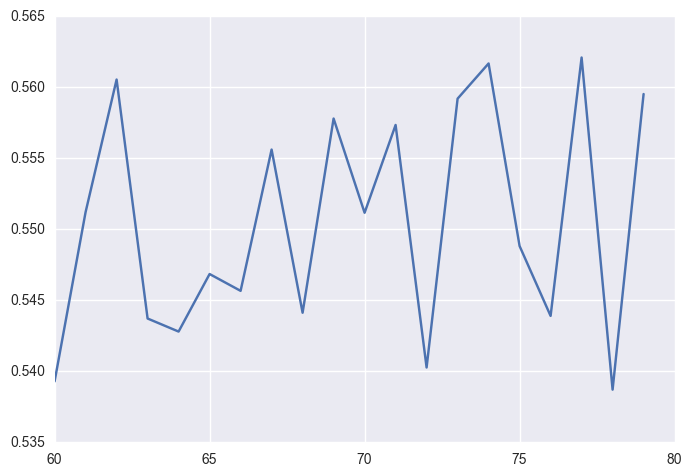

In [12]:
plt.plot(depths,scores)
plt.show()

In [13]:
print(n_opt)

77


In [15]:
import pickle

with open('decisiontree_arr.pkl', 'wb') as fid:
    pickle.dump(decisiontree_arr, fid,2)

### Departure Delay Model

### Using the same method

In [16]:
import pandas as pd
import numpy as np
import time
from sklearn.externals import joblib
tic = time.time()
df = pd.read_csv('../python-introduction-th2669/juneairline_data2.csv')
toc = time.time()
print("Finished reading CSV file in " + str(toc-tic) + " seconds")
df.head()


Finished reading CSV file in 0.28768396377563477 seconds


,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,DEP_HOUR,ARR_HOUR
0,1,VX,DCA,SFO,4.0,17,20
1,1,VX,LAX,MCO,-1.0,9,16
2,1,VX,MCO,LAX,-11.0,18,20
3,1,VX,FLL,LAX,-9.0,7,9
4,1,VX,LAX,FLL,30.0,9,18


In [17]:
df = pd.concat([df,pd.get_dummies(df['UNIQUE_CARRIER'],drop_first=True,prefix="UNIQUE_CARRIER")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN'],drop_first=True,prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEST'],drop_first=True,prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEP_HOUR'],drop_first=True,prefix="DEP_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ARR_HOUR'],drop_first=True,prefix="ARR_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],drop_first=True,prefix="DAY_OF_WEEK")],axis=1)

In [18]:
df.drop(['DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST','DEP_HOUR','ARR_HOUR'],axis=1,inplace=True)

In [19]:
# Define X and y variables
X = df.drop(['DEP_DELAY'], axis = 1)
y = df['DEP_DELAY']

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_test = np.array(y_test)
y_train = np.array(y_train)
                                                
random_dep = RandomForestRegressor()

                                                
# Train the model using the training sets
random_dep.fit(X_train,np.array(y_train))


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((random_dep.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % random_dep.score(X_test, y_test))

Residual sum of squares: 725.06
Variance score: 0.60


In [21]:
# Fit regression model
from sklearn.tree import DecisionTreeRegressor
import pylab as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_test = np.array(y_test)
y_train = np.array(y_train)

scores=[]
decisiontree_dep = DecisionTreeRegressor(max_depth=77)
# Train the model using the training sets
decisiontree_dep.fit(X_train, np.array(y_train))
scores.append(decisiontree_dep.score(X_test,y_test))
#plt.ylabel('R^2')
#plt.xlabel('Depth')
#plt.plot(75,scores)
#plt.show()

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((decisiontree_dep.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % decisiontree_dep.score(X_test, y_test))

Residual sum of squares: 879.53
Variance score: 0.53


In [22]:
import pickle

with open('decisiontree_dep.pkl', 'wb') as fid:
    pickle.dump(decisiontree_dep, fid,2)